# Visualization of PASEOS

First load the necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

# If you haven't installed PASEOS
import sys
sys.path.append("../..")

# We use pykep for orbit determination
import pykep as pk

import paseos
from paseos.actors.spacecraft_actor import SpacecraftActor
from paseos.actors.actor_builder import ActorBuilder
paseos.set_log_level("INFO")

13:26:10|PASEOS-DEBUG| Setting LogLevel to DEBUG
13:26:10|PASEOS-DEBUG| Loaded module.


For animations in notebooks you currently need to use `%matplotlib notebook`. This is supported by Jupyter Notebook, but, e.g., VSCode currently does not support this.

In [2]:
%matplotlib notebook

Create a PASEOS object. Add some actors

In [3]:
 # Define central body
earth = pk.planet.jpl_lp("earth")
sat1 = ActorBuilder.get_actor_scaffold(
        "sat1", SpacecraftActor, [0, 0, 0], pk.epoch(0)
    )
sat2 = ActorBuilder.get_actor_scaffold(
    "sat2", SpacecraftActor, [0, 0, 0], pk.epoch(0)
)

# Define local actor
sat3 = ActorBuilder.get_actor_scaffold(
    "sat3", SpacecraftActor, [10000000, 0, 0], pk.epoch(0)
)
ActorBuilder.set_orbit(sat3, [-10000000, 0.1, 0.1], [0, 8000.0, 0], pk.epoch(0), earth)
ActorBuilder.set_power_devices(sat3, 500, 10000, 1)

sat4 = ActorBuilder.get_actor_scaffold(
    "sat4", SpacecraftActor, [10000000, 0, 0], pk.epoch(0)
)
ActorBuilder.set_orbit(sat4, [0, 10000000, 0], [0, 0, 8000.0], pk.epoch(0), earth)


ActorBuilder.set_orbit(
    sat1,
    position=[10000000, 1e-3, 1e-3],
    velocity=[1e-3, 8000, 1e-3],
    epoch=pk.epoch(0),
    central_body=earth,
)
ActorBuilder.set_orbit(
    sat2,
    position=[10000000, 1e-3, 1e-3],
    velocity=[1e-3, -8000, 1e-3],
    epoch=pk.epoch(0),
    central_body=earth,
)

# Add communication link
ActorBuilder.add_comm_device(sat1, device_name="link1", bandwidth_in_kbps=1)
ActorBuilder.add_comm_device(sat2, device_name="link1", bandwidth_in_kbps=2)
ActorBuilder.set_power_devices(sat1, 500, 10000, 1)
ActorBuilder.set_power_devices(sat2, 500, 10000, 1)
sim = paseos.init_sim(sat1)
sim.add_known_actor(sat2)
sim.add_known_actor(sat3)
sim.add_known_actor(sat4)

<IPython.core.display.Javascript object>


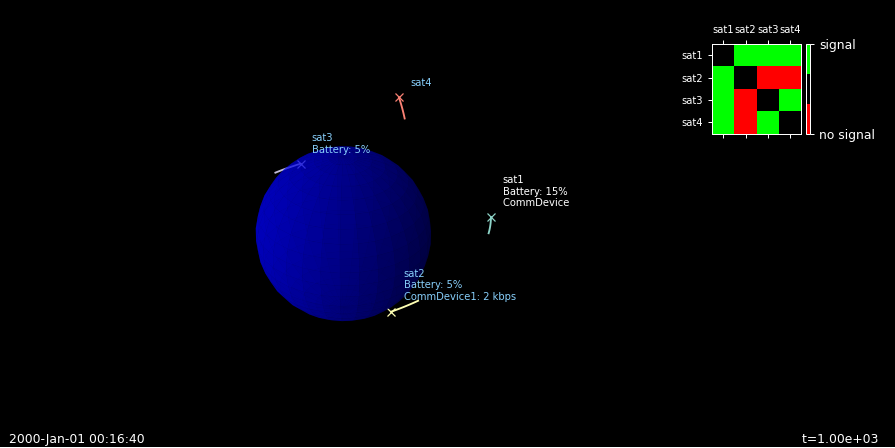

In [4]:
# Plot current status of PASEOS and get a plotter
plotter = paseos.plot(sim, paseos.PlotType.SpacePlot)

In [5]:
# Run some operations and inbetween update PASEOS
for i in range(100):
    sim.advance_time(10)
    plotter.update(sim)

In [ ]:
# Write an animation of the next 50 steps a 100s to a file called test.mp4
plotter.animate(sim,dt=100,steps=50,save_to_file="test")